In [94]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
% matplotlib inline

In [95]:
states = gpd.read_file('us_eco_l3.shp')
states.head()

,L1_KEY,L2_KEY,L3_KEY,NA_L1CODE,NA_L1NAME,NA_L2CODE,NA_L2NAME,NA_L3CODE,NA_L3NAME,Shape_Area,Shape_Leng,US_L3CODE,US_L3NAME,geometry
0,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,1.872044e+09,312708.089755,1,Coast Range,"POLYGON ((-2284145.6458 1942003.8598, -2284260..."
1,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,6.470114e+03,405.107034,1,Coast Range,"POLYGON ((-2326859.903999999 1961336.2543, -23..."
2,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,4.503063e+05,6693.388907,1,Coast Range,"POLYGON ((-2326706.4253 1962413.5469, -2326701..."
3,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,2.298740e+03,186.667132,1,Coast Range,"POLYGON ((-2328276.727 1965731.5141, -2328270...."
4,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,1.898114e+03,239.131689,1,Coast Range,"POLYGON ((-2332682.747500001 1971271.4419, -23..."


In [96]:
df = pd.read_csv('fire-events.csv')
df.head()

,fire_id,year,month,day,lat,long,acres_burned,na_l3name,na_l2name,na_l1name,yearmonth,mean_potential_et,total_precip,max_air_temp,mean_wind_speed
0,AL3038308812219980404,1998,4,4,30.383,-88.122,705,Southern Coastal Plain,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,EASTERN TEMPERATE FORESTS,1998-04,4.757972,50.624569,299.639977,4.281175
1,AL3041008830120050916,2005,9,16,30.410,-88.301,2914,Southern Coastal Plain,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,EASTERN TEMPERATE FORESTS,2005-09,4.952767,90.424602,305.166767,3.975596
2,AL3067208833720050207,2005,2,7,30.672,-88.337,696,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,2005-02,2.275852,110.091752,289.275777,4.016748
3,AL3105208777220050211,2005,2,11,31.052,-87.772,7334,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,2005-02,2.275852,110.091752,289.275777,4.016748
4,AL3110108837320050218,2005,2,18,31.101,-88.373,757,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,2005-02,2.275852,110.091752,289.275777,4.016748


In [97]:
def make_point(row):
    return Point(row.long, row.lat)
points = df.apply(make_point, axis=1)
df = gpd.GeoDataFrame(df, geometry=points)
df.crs = {'init': 'epsg:4326'}
df.head()

,fire_id,year,month,day,lat,long,acres_burned,na_l3name,na_l2name,na_l1name,yearmonth,mean_potential_et,total_precip,max_air_temp,mean_wind_speed,geometry
0,AL3038308812219980404,1998,4,4,30.383,-88.122,705,Southern Coastal Plain,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,EASTERN TEMPERATE FORESTS,1998-04,4.757972,50.624569,299.639977,4.281175,POINT (-88.12200000000001 30.383)
1,AL3041008830120050916,2005,9,16,30.410,-88.301,2914,Southern Coastal Plain,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,EASTERN TEMPERATE FORESTS,2005-09,4.952767,90.424602,305.166767,3.975596,POINT (-88.301 30.41)
2,AL3067208833720050207,2005,2,7,30.672,-88.337,696,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,2005-02,2.275852,110.091752,289.275777,4.016748,POINT (-88.337 30.672)
3,AL3105208777220050211,2005,2,11,31.052,-87.772,7334,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,2005-02,2.275852,110.091752,289.275777,4.016748,POINT (-87.77200000000001 31.052)
4,AL3110108837320050218,2005,2,18,31.101,-88.373,757,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,2005-02,2.275852,110.091752,289.275777,4.016748,POINT (-88.37299999999999 31.101)


In [98]:
states = states.to_crs(df.crs)
states.head()

,L1_KEY,L2_KEY,L3_KEY,NA_L1CODE,NA_L1NAME,NA_L2CODE,NA_L2NAME,NA_L3CODE,NA_L3NAME,Shape_Area,Shape_Leng,US_L3CODE,US_L3NAME,geometry
0,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,1.872044e+09,312708.089755,1,Coast Range,POLYGON ((-122.4715189587999 37.63402018708508...
1,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,6.470114e+03,405.107034,1,Coast Range,POLYGON ((-123.0025761708425 37.69391604233428...
2,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,4.503063e+05,6693.388907,1,Coast Range,POLYGON ((-123.0043472857334 37.70352666575616...
3,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,2.298740e+03,186.667132,1,Coast Range,POLYGON ((-123.0322677712933 37.72801282059357...
4,7 MARINE WEST COAST FOREST,7.1 MARINE WEST COAST FOREST,1 Coast Range,7,MARINE WEST COAST FOREST,7.1,MARINE WEST COAST FOREST,7.1.8,Coast Range,1.898114e+03,239.131689,1,Coast Range,POLYGON ((-123.0985489571485 37.76440585205502...


(-127.62234000038967,
 -64.060660000525061,
 23.301915454246185,
 50.626375454665919)

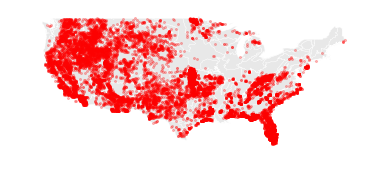

In [99]:
ax = states.plot(linewidth=0.25, edgecolor='white', color='lightgrey')
df.plot(markersize=2, alpha=0.25, color='red', ax=ax)
ax.axis('off')

In [ ]:
states_df = gpd.sjoin(df, states, how='left', op='within')
states_df.head()

,fire_id,year,month,day,lat,long,acres_burned,na_l3name,na_l2name,na_l1name,...,NA_L1CODE,NA_L1NAME,NA_L2CODE,NA_L2NAME,NA_L3CODE,NA_L3NAME,Shape_Area,Shape_Leng,US_L3CODE,US_L3NAME
0,AL3038308812219980404,1998,4,4,30.383,-88.122,705,Southern Coastal Plain,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,EASTERN TEMPERATE FORESTS,...,8,EASTERN TEMPERATE FORESTS,8.5,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,8.5.3,Southern Coastal Plain,1.392414e+11,9.682345e+06,75,Southern Coastal Plain
1,AL3041008830120050916,2005,9,16,30.410,-88.301,2914,Southern Coastal Plain,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,EASTERN TEMPERATE FORESTS,...,8,EASTERN TEMPERATE FORESTS,8.5,MISSISSIPPI ALLUVIAL AND SOUTHEAST USA COASTAL...,8.5.3,Southern Coastal Plain,1.392414e+11,9.682345e+06,75,Southern Coastal Plain
2,AL3067208833720050207,2005,2,7,30.672,-88.337,696,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,...,8,EASTERN TEMPERATE FORESTS,8.3,SOUTHEASTERN USA PLAINS,8.3.5,Southeastern Plains,3.288765e+11,9.534773e+06,65,Southeastern Plains
3,AL3105208777220050211,2005,2,11,31.052,-87.772,7334,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,...,8,EASTERN TEMPERATE FORESTS,8.3,SOUTHEASTERN USA PLAINS,8.3.5,Southeastern Plains,3.288765e+11,9.534773e+06,65,Southeastern Plains
4,AL3110108837320050218,2005,2,18,31.101,-88.373,757,Southeastern Plains,SOUTHEASTERN USA PLAINS,EASTERN TEMPERATE FORESTS,...,8,EASTERN TEMPERATE FORESTS,8.3,SOUTHEASTERN USA PLAINS,8.3.5,Southeastern Plains,3.288765e+11,9.534773e+06,65,Southeastern Plains


In [ ]:
ax = states.to_crs({'proj': 'merc'}).plot(color='#cccccc', edgecolor='white', figsize=(7,7))
df.to_crs({'proj': 'merc'}).plot(ax=ax, color='red', markersize=3, alpha=0.5)
ax.axis('off')

In [ ]:
df_84 = df[df['year']== 1984]
df_84

In [ ]:
def make_point(row):
    return Point(row.long, row.lat)
points = df_84.apply(make_point, axis=1)
df_84 = gpd.GeoDataFrame(df_84, geometry=points)
df_84.crs = {'init': 'epsg:4326'}
df_84.head()

In [ ]:
states_84 = states.to_crs(df_84.crs)
states_84.head()

In [ ]:
ax_84 = states_84.plot(linewidth=0.25, edgecolor='white', color='lightgrey')
df_84.plot(markersize=2, alpha=0.25, color='red', ax_84=ax_84)
ax_84.axis('off')

In [ ]:
statesdf_84 = gpd.sjoin(df_84, states_84, how='left', op='within')
statesdf_84.head()

In [ ]:
ax_84 = states_84.to_crs({'proj': 'merc'}).plot(color='#cccccc', edgecolor='white', figsize=(7,7))
df_84.to_crs({'proj': 'merc'}).plot(ax=ax, color='red', markersize=3, alpha=0.5)
ax_84.axis('off')